In [76]:
from __future__ import division
import distance
import os
import ast
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import distance
from collections import OrderedDict
import networkx as nx
import seaborn as sns
sns.set(rc={'axes.facecolor':'white'})

%matplotlib inline

### 1. Loading in data

In [77]:
#Hypothetical chronological order
aas = ['gly','ala','asp','val','pro','ser','glu','leu','thr','arg','gln','ile','asn','his','lys','cys','phe','tyr','met','trp']

In [78]:
trnas = OrderedDict()

for aa in aas:
    trnas[aa] = pd.DataFrame.from_csv('../data/' + aa + '.txt', sep = '\t')

### 2. Building graphs

In [79]:
H = {}

for aa in trnas:
    H[aa] = nx.Graph()
    H[aa].size = {}
    H[aa].color = {}
    H[aa].width = {}

    for i in trnas[aa].index:

        H[aa].add_node(i)

    for i in trnas[aa].index:
        for j in ast.literal_eval(trnas[aa]['Adjacency'].ix[i]):
            H[aa].add_edge(trnas[aa].ix[i].name, trnas[aa].ix[j].name)

### 3. Degree

#### 3.1. Average degrees

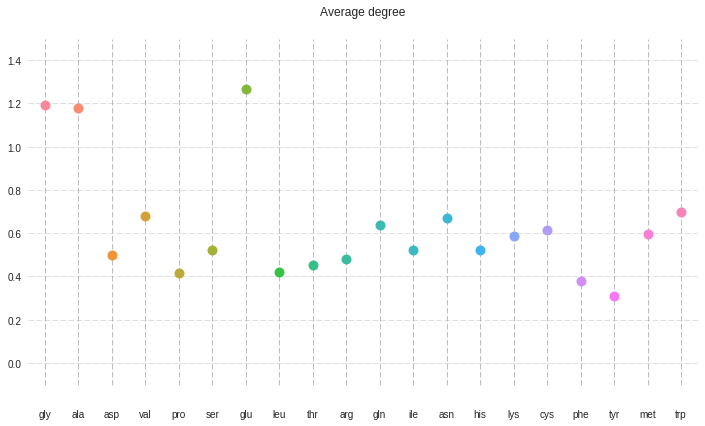

In [119]:
avgDegree = []

for aa in aas:
    avgDegree.append(np.mean(nx.degree(H[aa]).values()))
    
plt.figure(figsize=[12,7])
plt.grid(True, ls='--', lw=0.5, alpha=0.5, dash_capstyle = 'round', c='gray')
sns.stripplot(aas, avgDegree,size=10)
for i in range(20):
    plt.plot([i]*1000, np.linspace(-0.1,1.5,1000), '--', color='grey', lw=0.5)
plt.title('Average degree');

#### 3.2. Degree distribution

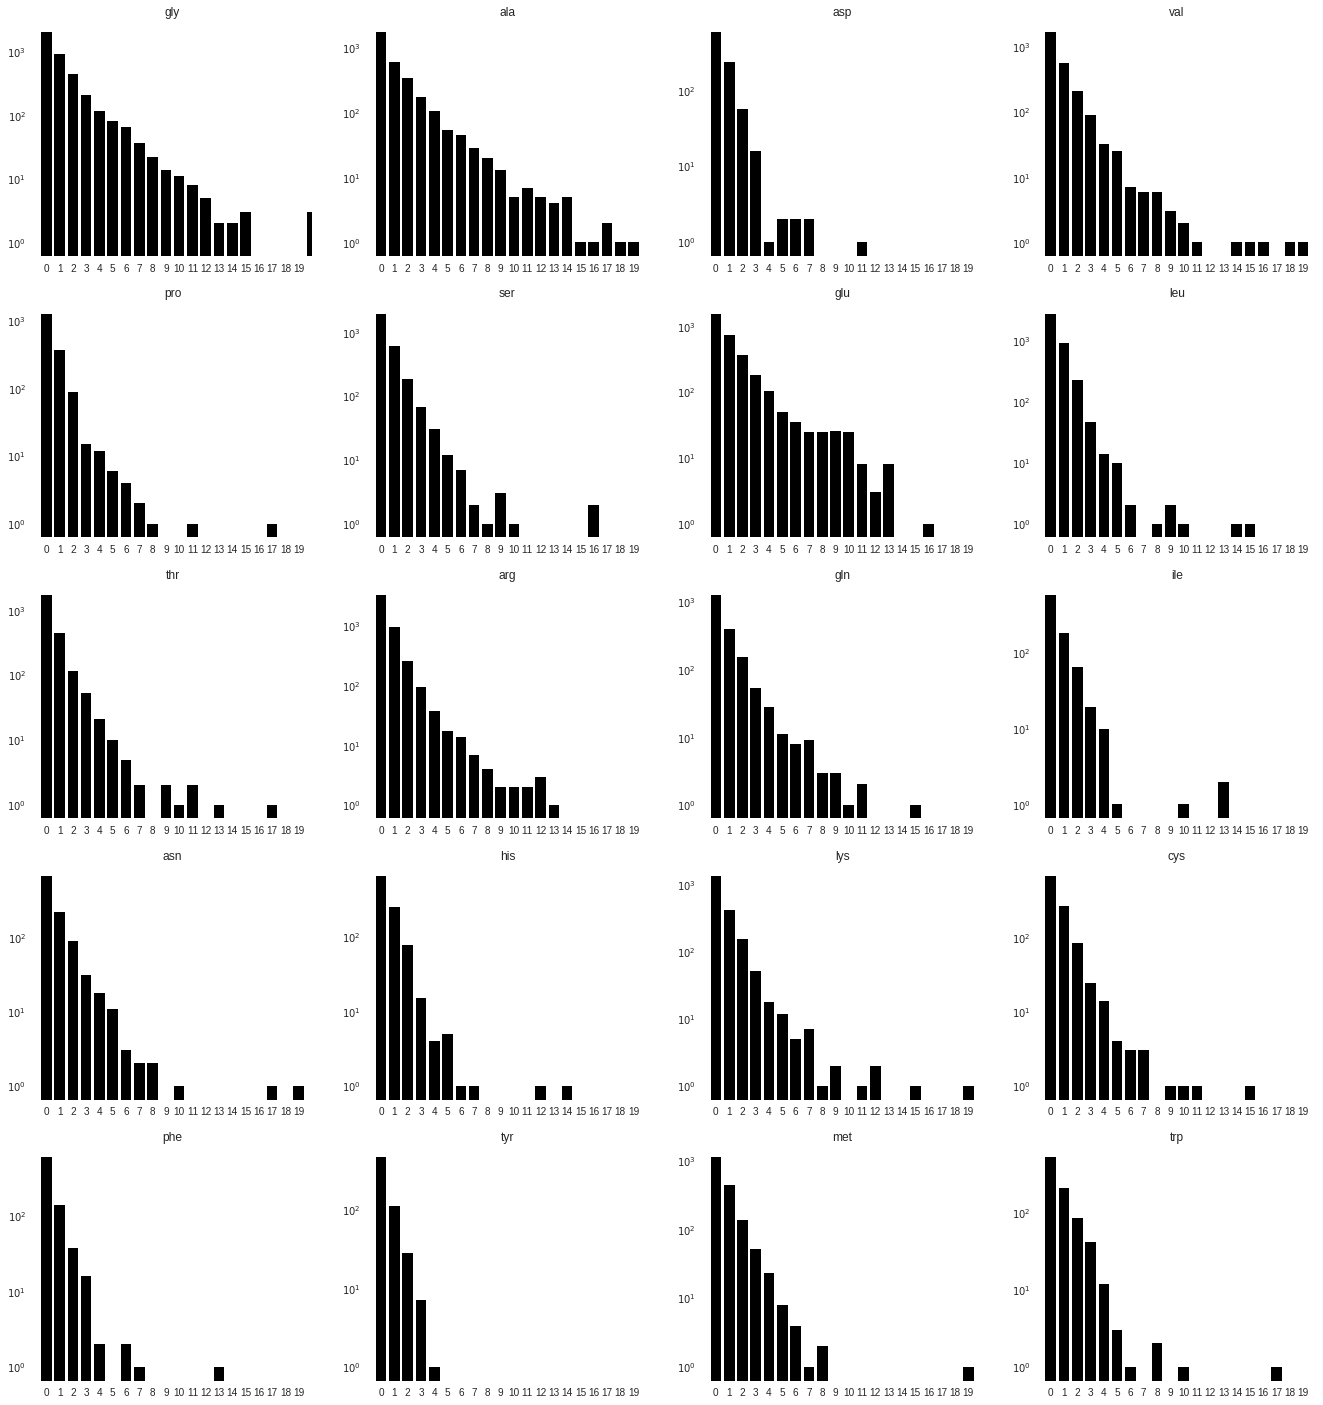

In [104]:
plt.figure(figsize=(4*5+3,5*5))
count=1
    
for aa in trnas:
    plt.subplot(5,4,count)
    degreeHist = nx.degree_histogram(H[aa])
    plt.bar([x for x in range(len(degreeHist))], degreeHist, color='k', log=True)
    plt.title(aa)
    plt.xticks([x for x in range(20)])
    plt.xlim(-1,20)
    count+=1

### 4. Connected components

In [105]:
connectedComponents=[]
for aa in aas:
    counter = 0
    for i in nx.connected_components(H[aa]):
        if len(i)>1:
            counter += 1
    connectedComponents.append(counter)

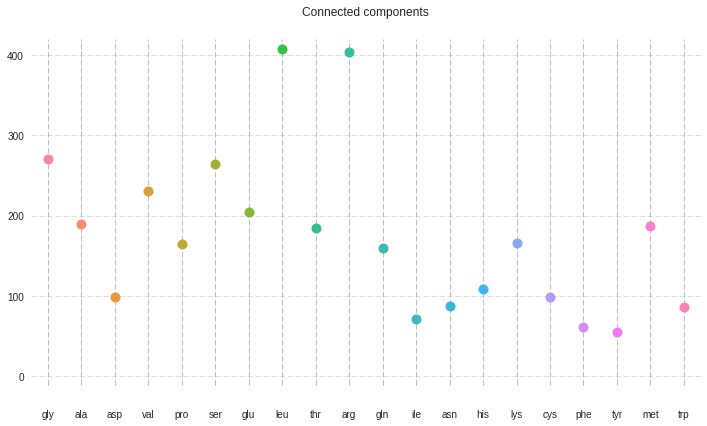

In [109]:
plt.figure(figsize=[12,7])
plt.grid(True, ls='--', lw=0.5, alpha=0.5, dash_capstyle = 'round', c='gray')
sns.stripplot(aas, connectedComponents, size=10)
for i in range(20):
    plt.plot([i]*1000, np.linspace(-10,420,1000), '--', color='grey', lw=0.5)
plt.title('Connected components');

### 5. Average clustering coefficients

<img src= "http://barabasi.com/networksciencebook/images/ch-02/figure-2-16.jpg", width=400>

In [116]:
for aa in aas:
    print aa,'\t',nx.average_clustering(H[aa])

gly 	0.0
ala 	0.0
asp 	0.0
val 	0.0
pro 	0.0
ser 	0.0
glu 	0.0
leu 	0.0
thr 	0.0
arg 	0.0
gln 	0.0
ile 	0.0
asn 	0.0
his 	0.0
lys 	0.0
cys 	0.0
phe 	0.0
tyr 	0.0
met 	0.0
trp 	0.0
